# Projeto Final - Let's Code
# Turma de Data Science & Inteligência Artificial
# Classificação de texto: Amazon Data Science Book Reviews

Os dados que irei utilizar estão disponíveis na plataforma Kaggle. É um dataset da Amazon, composto pelo número de estrelas, as reviews e as URLs de cada livro de data science. Será feita uma classificação dos comentários, a partir da quantidade de estrelas que apresentou. Para saber mais sobre o dataset, confira o link: https://www.kaggle.com/vvorotnikov/amazon-data-science-book-reviews

In [1]:
#Importando as bibliotecas padrões
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## 1. Carregando o Conjunto de Dados e Visão Geral

Para iniciarmos, iremos utilizar a biblioteca pandas para carregar o conjunto de dados baixado do kaggle e para definirmos como tamanho máximo a coluna, a fim de visualizar o comentário de forma completa. Além disso iremos analisar informações gerais contidas nos dados.

In [2]:
#carregando os dados
df_amazon = pd.read_csv('reviews.csv')
pd.set_option ('display.max_colwidth', None)

In [3]:
#visualizando as primeiras linhas
df_amazon.head()

stars  \
0    5.0   
1    1.0   
2    5.0   
3    4.0   
4    5.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     comment  \
0  Let me say at the outset of this review, that I respect the author and the sheer guile of trying to attack what is a Ph.D. level topic, in a single book. I have been an SW engineer for the last 15 years, have an engineering degree, and have done some research into GA's and image segmentation, many years ago... and I found this book challenging.When I was in college, the joke about Comp Sci was that it was really just "applied math." That wasn't really funny, but it is gosh-darned true, doubly so when dealing with data science, AI, and ML, all of which are fancy words for "applied statistics."So, the book gives you a background in various topics such as stat, probability theory, linear algebra, programming, and touches on a few topics from calculus. If you're unfamiliar with those things, you will not be able to learn them from one book, or all at once. It's just too much.The author leaves lots of bread-crumbs for you to follow. If you're not strong any of the subjects I've mentioned, plan on reading some of the books he recommends (most are online).After that, the book is a solid tour of data science, and surprisingly, there's some material on AI/ML. All of it is well done. The only criticism I have is, I would have liked more equations alongside the code. I know equations scare people, but this is "Data Science."TLDR? This is a serious-minded book for serious people. There aren't any easy answers, but it's a great education.   
1                                                                                                                                                                                                                                                                                                                                                                                                     Its Capitalism at its best. I read the book from my nearby bookstore and like any other reviewer, the book is grayscale. Which I think is totally unacceptable given the price. I bought R for Data Science before which is 3 times cheaper than this book and its colored for charts and the codes. I mean, come on OReilly, why all the latest version is priced at $69.99? Oh I know, its because Amazon pricing algorithm will certainly reduce the price to the original intended price they want which is around $30.Its not wrong to make profit, but when its grayscale, and the paper feels cheap. Its certainly Cost savings and selling a

In [4]:
#visualizando as últimas linhas
df_amazon.tail()

stars  \
20642    3.0   
20643    5.0   
20644    3.0   
20645    5.0   
20646    5.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             comment  \
20642                                                                                                                                                                                                                                                                                                 This book offers nice information and thoughts on thinking about becoming a librarian. Unfortunately it is very repetitive and could have used some more editing before publishing. (Typos!!!)   
20643                                                                                                                                                                                                                                                                                                                                     Am disabled, retired RN, but always wished I was a librarian!:-)  Perhaps will encourage a grandchild....we are blessed with nine by the grace of God! :-)   
20644          At one point I considered library work as opposed to working for a literacy non-profit in a library setting.  The first few pages were so elementary that I could not keep my eyes on the pages.  My mind wandered and I had to wonder if this book would offer me any guidance.  I already have a B.A.Ed. and an M.A.J.  Perhaps suited more for someone starting their search for life's calling rather than someone considering a switch to a more exciting, or purposeful career.   
20645  Overall, I think this is an excellent resource for anyone pursuing a career as a librarian. As a library school student, I think she does a very accurate and honest job of telling you what it is like and her tips for school survival are great. If she is this good at describing the school experience, I think it is safe to assume her advice and discussion for the actual work of being a librarian is accurate as well. I recommend it to anyone thinking about pursing their MLIS.   
20646                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          GREAT   

                                   book_url  
20642  https://www.amazon.com/dp/0980200482  
20643  https://www.amazon.com/dp/0980200482  
20644  https://www.amazon.com/dp/0980200482  
20645  https://www.amazon.com/dp/0980200482  
20646  https://www.amazon.com/dp/0980200482

In [5]:
#tamanho do conjunto
df_amazon.shape

(20647, 3)

In [6]:
#descrição geral dos dados
df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20647 entries, 0 to 20646
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   stars     20647 non-null  float64
 1   comment   20647 non-null  object 
 2   book_url  20647 non-null  object 
dtypes: float64(1), object(2)
memory usage: 484.0+ KB


## 2. Análise Exploratória dos Dados

Nesta etapa iremos entender melhor o conjunto de dados que estamos trabalhando, ou seja, extrair informações úteis para as etapas de pré-processamento e de modelagem.

In [7]:
#frequência das estrelas 
df_amazon.stars.value_counts()

5.0    13963
4.0     2894
3.0     1431
1.0     1430
2.0      929
Name: stars, dtype: int64

In [8]:
#descrição estatística das estrelas 
df_amazon.stars.describe()

count    20647.000000
mean         4.309197
std          1.205554
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: stars, dtype: float64

In [9]:
#descrição estatística dos comentários (reviews)
df_amazon.comment.describe()

count     20647
unique    19562
top        Good
freq         39
Name: comment, dtype: object

In [10]:
#descrição estatística dos comentários agrupado por estrela
df_amazon.groupby('stars').describe()

comment         \
        count unique   
stars                  
1.0      1430   1387   
2.0       929    900   
3.0      1431   1383   
4.0      2894   2777   
5.0     13963  13174   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           \
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      top   
stars                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
1.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      The print quality of mine is horrible. A lot of pages with problems. It is possible to read, but it is annoying.   
2.0    This book is very informative, but it is not readable unless one has a good deal of background in remote sensing. My problem is it is written in such a difficult way that it is very hard to learn anything. It seems the authors strive to use the most difficult and shrouded language possible when describing basic concepts. I spent my semester deciphering what they meant and I was constantly looking up more accessible information online which was worded in everyday language. Not helpful for beginning students, other than the first chapter or so on history of remote sensing. If you wish to learn about the topic, I 

<AxesSubplot:xlabel='stars', ylabel='count'>

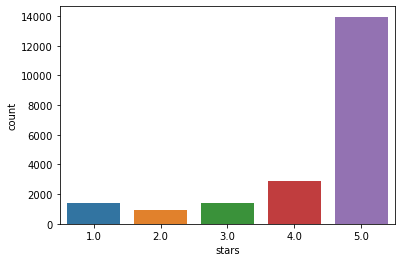

In [11]:
#visualizando as estrelas
sns.countplot(x = df_amazon['stars'], data=df_amazon)

In [12]:
#Filtro para cada estrela
five_stars = df_amazon[df_amazon['stars'] == 5.0]
four_stars = df_amazon[df_amazon['stars'] == 4.0]
three_stars = df_amazon[df_amazon['stars'] == 3.0]
two_stars = df_amazon[df_amazon['stars'] == 2.0]
one_star = df_amazon[df_amazon['stars'] == 1.0]

In [13]:
#instalação da biblioteca nuvem de palavras
!pip install wordcloud

In [14]:
#importando a biblioteca para criação da nuvem de palavras
from wordcloud import WordCloud, STOPWORDS

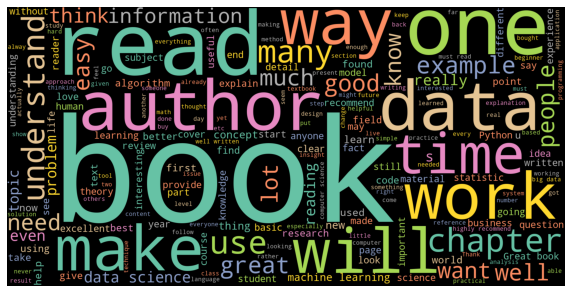

In [15]:
# concatenar as palavras
all_five = " ".join(word for word in five_stars.comment)

# lista de stopwords 
stopwords = set(STOPWORDS)

# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="black", 
                      colormap = 'Set2', 
                      width = 2000, height = 1000,
                     random_state = 42).generate(all_five)

#mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud)
ax.set_axis_off()

plt.imshow(wordcloud)

In [16]:
#exemplo
all_five = all_five.lower()
print(all_five[:100])
print(' ')
print(f' Quantidade de caracteres - 5 estrelas: {len(all_five)}')

let me say at the outset of this review, that i respect the author and the sheer guile of trying to 
 
 Quantidade de caracteres - 5 estrelas: 6736414


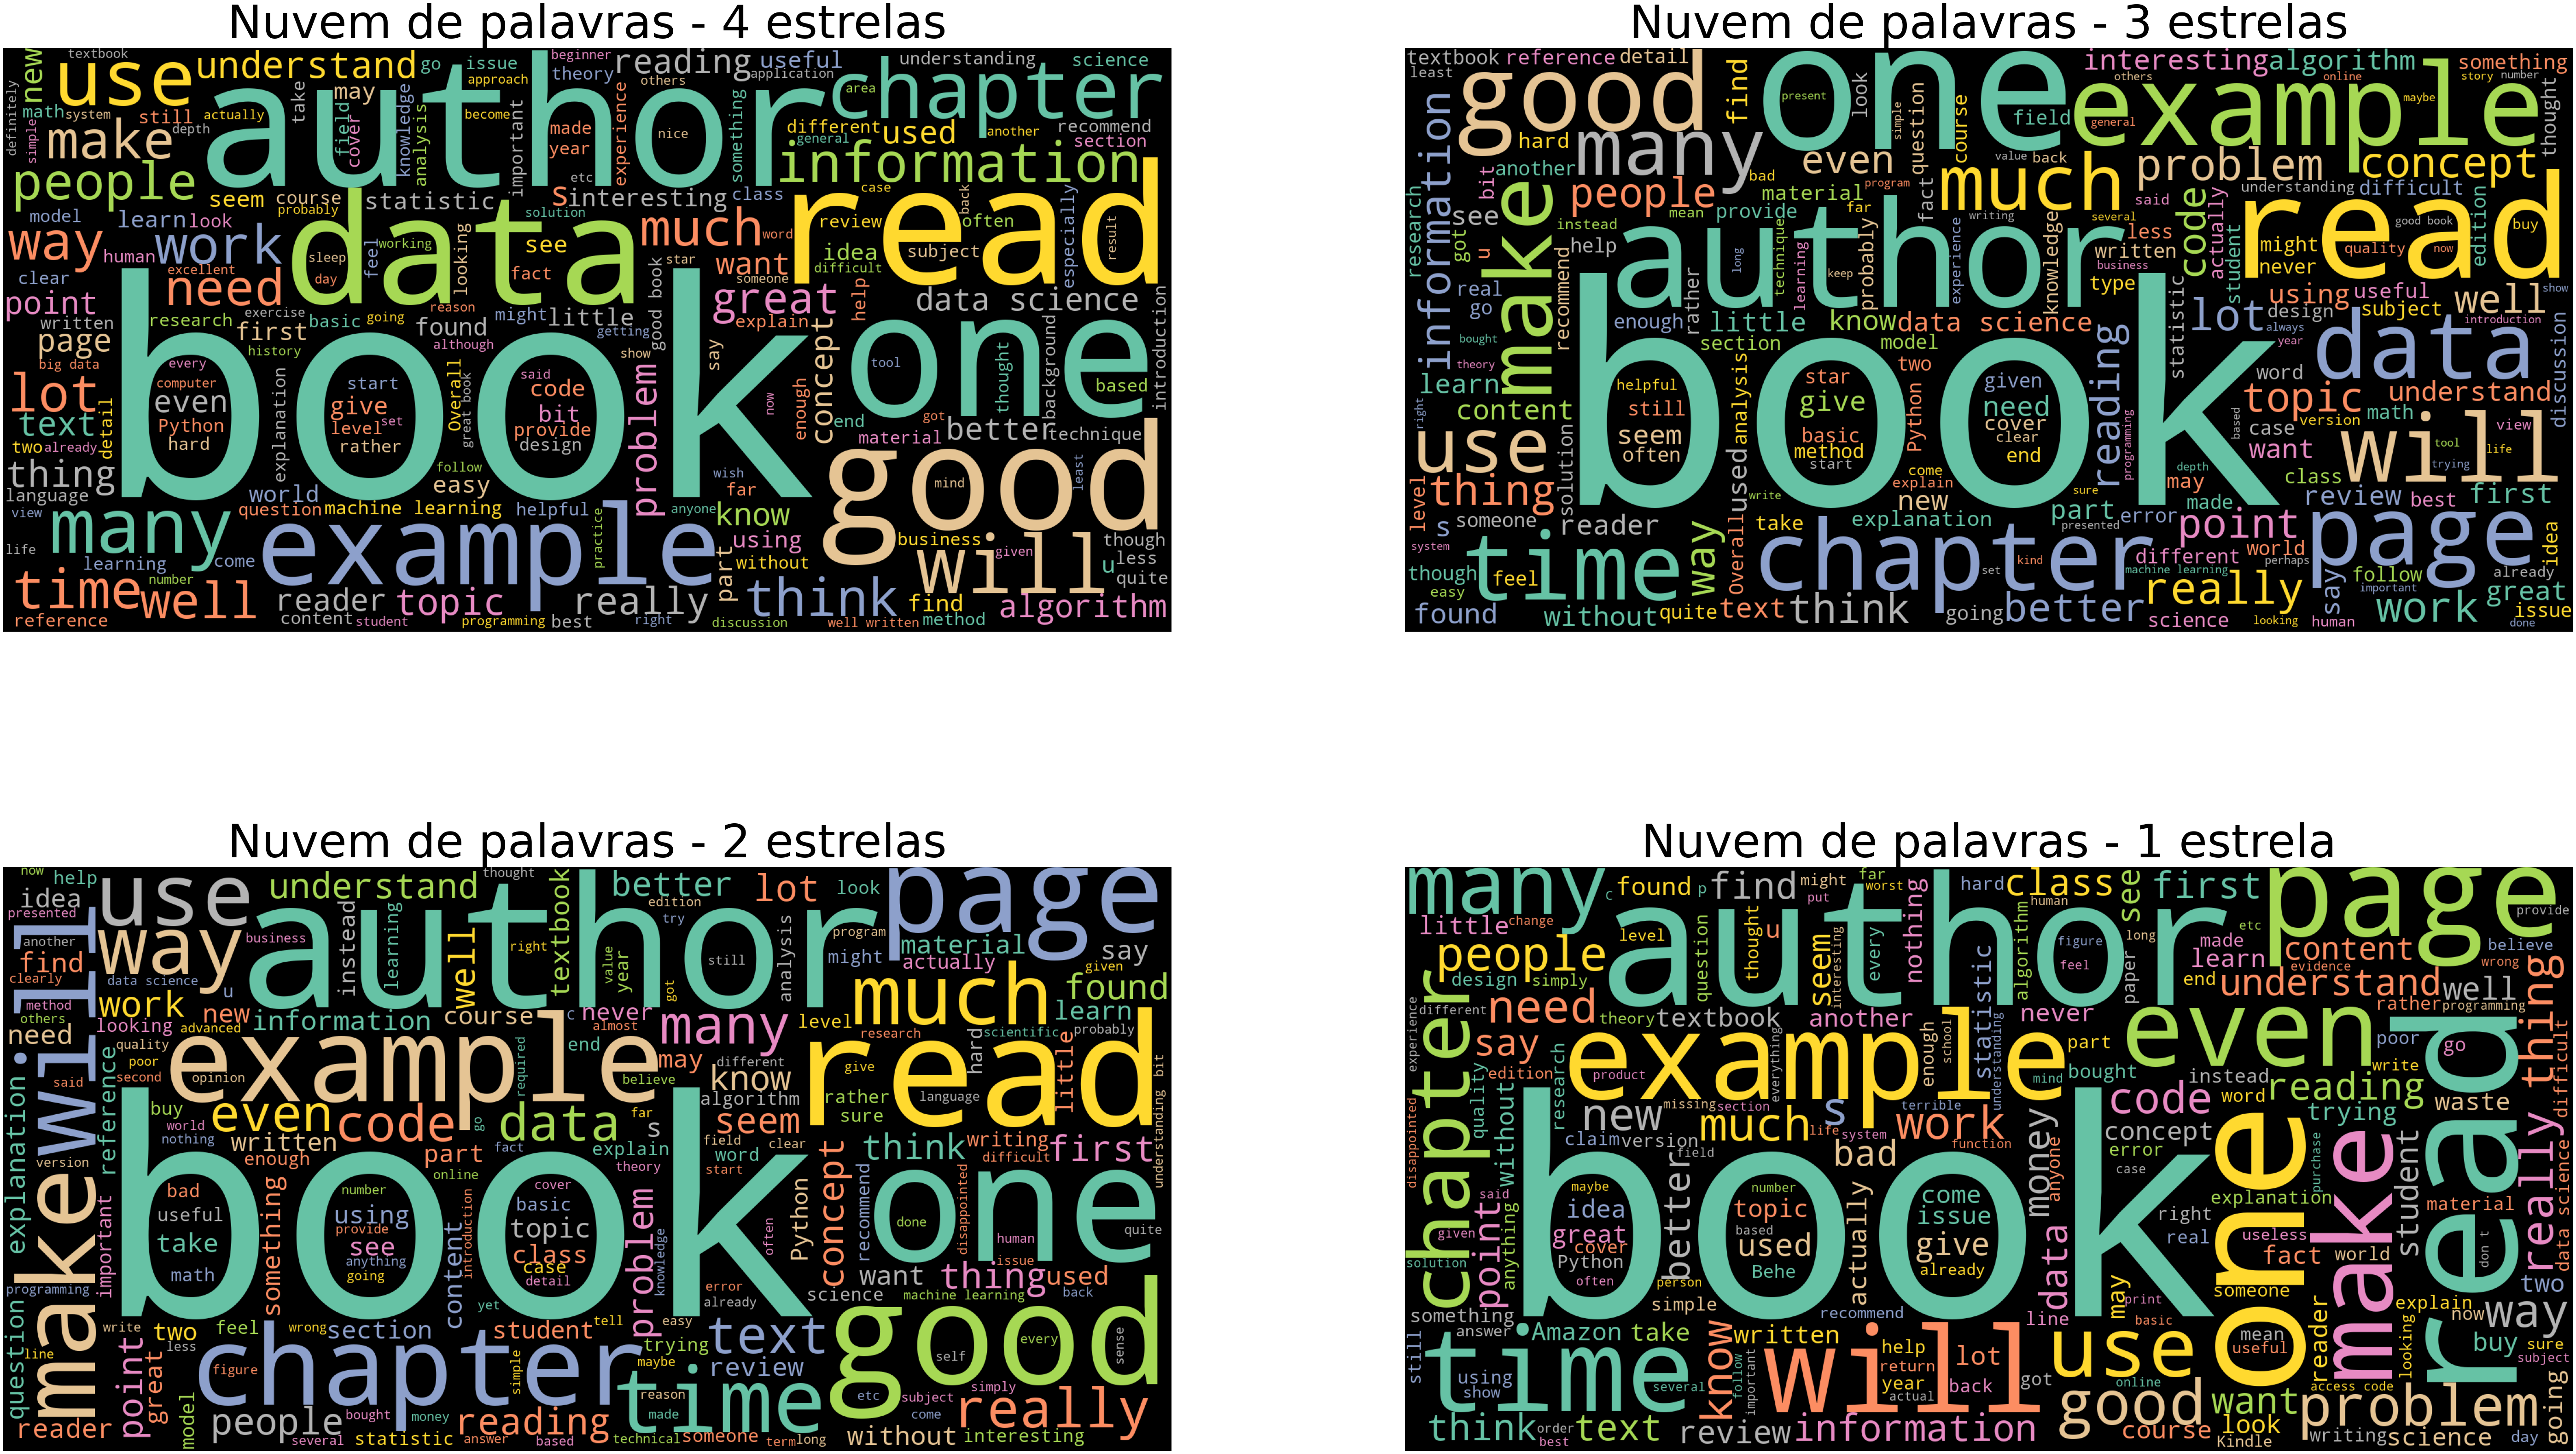

In [17]:
# concatenar as palavras
all_four = " ".join(word for word in four_stars.comment)
all_three = " ".join(word for word in three_stars.comment)
all_two = " ".join(word for word in two_stars.comment)
all_one = " ".join(word for word in one_star.comment)

# lista de stopwords 
stopwords = set(STOPWORDS)

# gerar uma wordcloud
wordcloud4 = WordCloud(stopwords=stopwords, 
                      background_color="black", 
                      colormap = 'Set2', 
                      width = 2000, height = 1000,
                     random_state = 42).generate(all_four)

wordcloud3 = WordCloud(stopwords=stopwords, 
                      background_color="black", 
                      colormap = 'Set2', 
                      width = 2000, height = 1000,
                     random_state = 42).generate(all_three)

wordcloud2 = WordCloud(stopwords=stopwords, 
                      background_color="black", 
                      colormap = 'Set2', 
                      width = 2000, height = 1000,
                     random_state = 42).generate(all_two)

wordcloud1 = WordCloud(stopwords=stopwords, 
                      background_color="black", 
                      colormap = 'Set2', 
                      width = 2000, height = 1000,
                     random_state = 42).generate(all_one)

#imagem final em vários plots
fig, ((ax4, ax3) , (ax2, ax1)) = plt.subplots(2, 2, figsize = (100,60))

#wordcloud four_stars
ax4.imshow(wordcloud4)
ax4.set_axis_off()
ax4.set_title('Nuvem de palavras - 4 estrelas', fontsize = 100)
#plt.imshow(wordcloud4)

#wordcloud three_stars
ax3.imshow(wordcloud3)
ax3.set_axis_off()
ax3.set_title('Nuvem de palavras - 3 estrelas', fontsize = 100)
#plt.imshow(wordcloud3)

#wordcloud two_stars
ax2.imshow(wordcloud2)
ax2.set_axis_off()
ax2.set_title('Nuvem de palavras - 2 estrelas', fontsize = 100)
#plt.imshow(wordcloud2)

#wordcloud one_star
ax1.imshow(wordcloud1)
ax1.set_axis_off()
ax1.set_title('Nuvem de palavras - 1 estrela', fontsize = 100)


plt.show()

In [18]:
#importando a biblioteca para trabalhar com dados de texto
import nltk

#divisão do texto em sentenças (frases)
sents5 = nltk.sent_tokenize(all_five)

sents4 = nltk.sent_tokenize(all_four)

sents3 = nltk.sent_tokenize(all_three)

sents2 = nltk.sent_tokenize(all_two)

sents1 = nltk.sent_tokenize(all_one)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anacl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


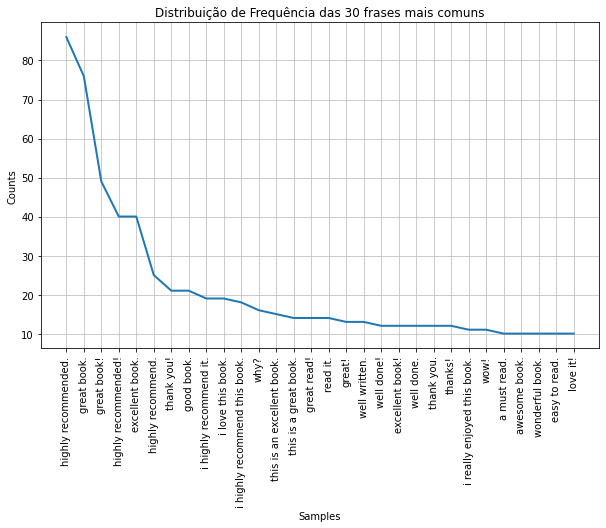

<AxesSubplot:title={'center':'Distribuição de Frequência das 30 frases mais comuns'}, xlabel='Samples', ylabel='Counts'>

In [19]:
#download da lista de stopwords
nltk.download('stopwords')

#importando bibliotecas para tratar as stopwords, os pontos e a frequência de palavras
from nltk.corpus import stopwords
import string
from nltk import FreqDist

#remover stopwords, pontuações e dígitos do conjunto de 5 estrelas
remove_these = set(stopwords.words('english') + list(string.punctuation) + list(string.digits))
filtered_text = [w for w in sents5 if not w in remove_these]

#cálculo da frequência das frases
fdist_filtered = FreqDist(filtered_text)

#visualizar as 30 frases mais frequentes
plt.figure(figsize=(10, 6))
fdist_filtered.plot(30, title='Distribuição de Frequência das 30 frases mais comuns')

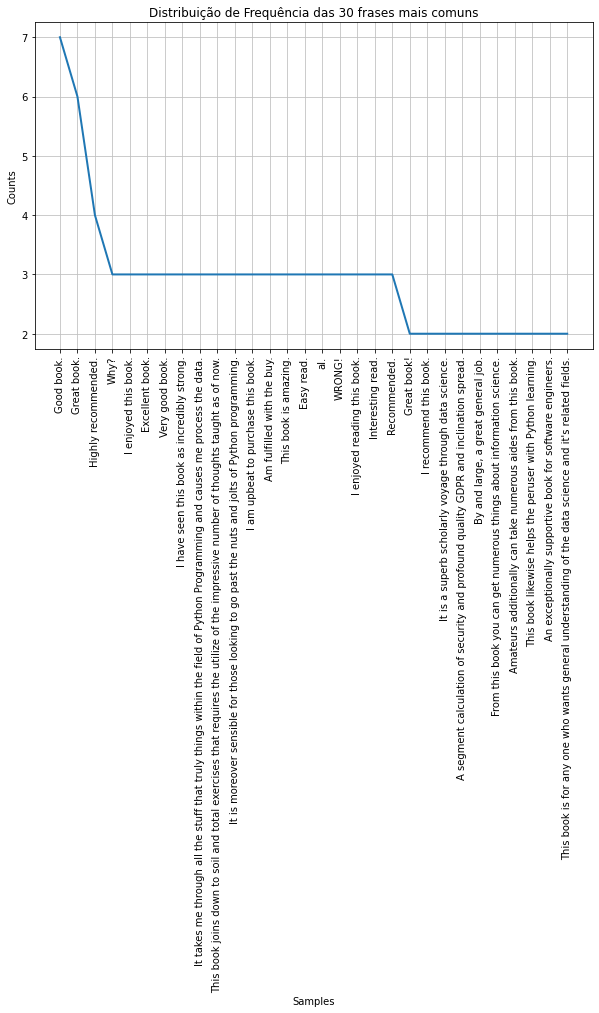

<AxesSubplot:title={'center':'Distribuição de Frequência das 30 frases mais comuns'}, xlabel='Samples', ylabel='Counts'>

In [20]:
#remover stopwords, pontuações e dígitos do conjunto de 4 estrelas
remove_these = set(stopwords.words('english') + list(string.punctuation) + list(string.digits))
filtered_text = [w for w in sents4 if not w in remove_these]

#cálculo da frequência das frases
fdist_filtered = FreqDist(filtered_text)

#visualizar as 30 frases mais frequentes
plt.figure(figsize=(10, 6))
fdist_filtered.plot(30, title='Distribuição de Frequência das 30 frases mais comuns')

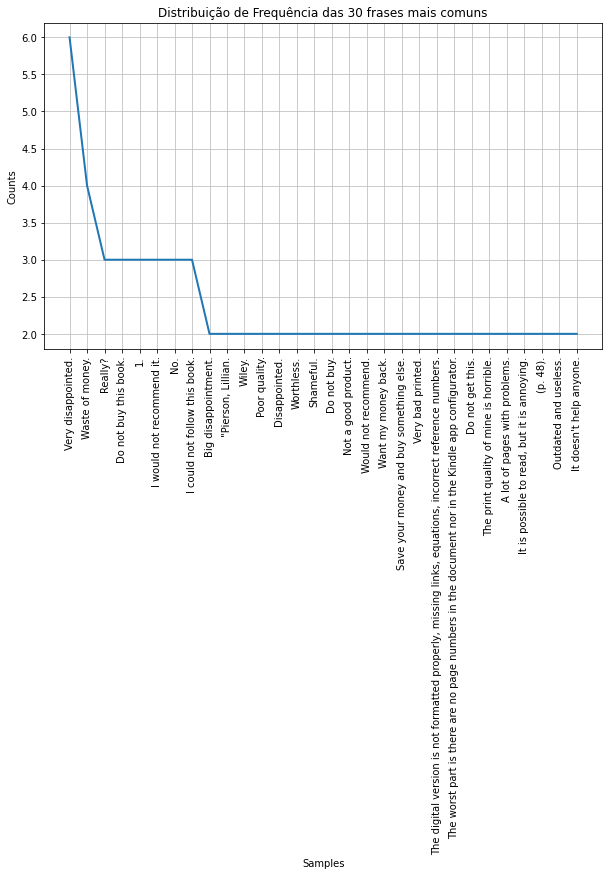

<AxesSubplot:title={'center':'Distribuição de Frequência das 30 frases mais comuns'}, xlabel='Samples', ylabel='Counts'>

In [21]:
#remover stopwords, pontuações e dígitos do conjunto de 1 estrela
remove_these = set(stopwords.words('english') + list(string.punctuation) + list(string.digits))
filtered_text = [w for w in sents1 if not w in remove_these]

#cálculo da frequência das frases
fdist_filtered = FreqDist(filtered_text)

#visualizar as 30 frases mais frequentes
plt.figure(figsize=(10, 6))
fdist_filtered.plot(30, title='Distribuição de Frequência das 30 frases mais comuns')

In [22]:
#normalizando as palavras para minúsculas
all_four = all_four.lower()
all_three = all_three.lower()
all_two = all_two.lower()
all_one = all_one.lower()

#contagem de caracteres
print(f' Quantidade de caracteres - 5 estrelas: {len(all_five)}')
print(f' Quantidade de caracteres - 4 estrelas: {len(all_four)}')
print(f' Quantidade de caracteres - 3 estrelas: {len(all_three)}')
print(f' Quantidade de caracteres - 2 estrelas: {len(all_two)}')
print(f' Quantidade de caracteres - 1 estrela: {len(all_one)}')

 Quantidade de caracteres - 5 estrelas: 6736414
 Quantidade de caracteres - 4 estrelas: 1754359
 Quantidade de caracteres - 3 estrelas: 900945
 Quantidade de caracteres - 2 estrelas: 540830
 Quantidade de caracteres - 1 estrela: 728332


Podemos notar que nossa variável target possui um desbalanceamento entre as estrelas atribuidas aos livros. Além disso pode-se observar que quando olhamos as frequências das palavras, pouca informação foi extraída, ao contrário da frequência das frases, que notamos a possibilidade de transformar nossa variável target. 

## 2. Pré-processamento

Após a coleta e o entendimento inicial dos dados, será necessário estruturá-los, para viabilizar a aplicação dos modelos de classificação.

Vamos começar removendo a coluna book_url, que neste caso não trará nenhuma informação relevante para a classificação.

In [23]:
df_amazon.drop('book_url', axis = 1, inplace = True)

## 2.1 Tokenização

Esta é a etapa que segmenta o texto em palavras (tokens). A palavra é a unidade miníma para a máquina poder entender e processar.

In [43]:
#tokenização
text1 = nltk.word_tokenize(five_stars.comment[2])

In [44]:
print(f'Antes da Tokenização: {five_stars.comment[2]} \n\nDepois da Tokenização: {text1}')

Antes da Tokenização: If you're looking to get started with data science but you're confused on which material to use...videos, books, a specific online class, etc...start with this book and see where it takes you. This book will give you a great place to start and afterwards, you will have enough knowledge to make an educated choice on what educational resource to use next. 

Depois da Tokenização: ['If', 'you', "'re", 'looking', 'to', 'get', 'started', 'with', 'data', 'science', 'but', 'you', "'re", 'confused', 'on', 'which', 'material', 'to', 'use', '...', 'videos', ',', 'books', ',', 'a', 'specific', 'online', 'class', ',', 'etc', '...', 'start', 'with', 'this', 'book', 'and', 'see', 'where', 'it', 'takes', 'you', '.', 'This', 'book', 'will', 'give', 'you', 'a', 'great', 'place', 'to', 'start', 'and', 'afterwards', ',', 'you', 'will', 'have', 'enough', 'knowledge', 'to', 'make', 'an', 'educated', 'choice', 'on', 'what', 'educational', 'resource', 'to', 'use', 'next', '.']


## 2.4 Stop Words

In [46]:
#remoção de stopwords
tokens1 = [word for word in text1 if not word in stopwords.words('english')]

In [47]:
print(f'Antes com stopwords: {text1} \n\nDepois sem stopwords: {tokens1}')

Antes com stopwords: ['If', 'you', "'re", 'looking', 'to', 'get', 'started', 'with', 'data', 'science', 'but', 'you', "'re", 'confused', 'on', 'which', 'material', 'to', 'use', '...', 'videos', ',', 'books', ',', 'a', 'specific', 'online', 'class', ',', 'etc', '...', 'start', 'with', 'this', 'book', 'and', 'see', 'where', 'it', 'takes', 'you', '.', 'This', 'book', 'will', 'give', 'you', 'a', 'great', 'place', 'to', 'start', 'and', 'afterwards', ',', 'you', 'will', 'have', 'enough', 'knowledge', 'to', 'make', 'an', 'educated', 'choice', 'on', 'what', 'educational', 'resource', 'to', 'use', 'next', '.'] 

Depois sem stopwords: ['If', "'re", 'looking', 'get', 'started', 'data', 'science', "'re", 'confused', 'material', 'use', '...', 'videos', ',', 'books', ',', 'specific', 'online', 'class', ',', 'etc', '...', 'start', 'book', 'see', 'takes', '.', 'This', 'book', 'give', 'great', 'place', 'start', 'afterwards', ',', 'enough', 'knowledge', 'make', 'educated', 'choice', 'educational', 'reso

## 2.2 Normalização

Engloba a etapa de converter as palavras para minúsculo, remover pontos e dígitos, a fim de evitar erros de palavras no aprendizado da máquina. 

In [45]:
#exemplo
#remoção de pontuação
from string import punctuation

In [50]:
tokens2 = [word for word in tokens1 if word not in punctuation]

In [51]:
print(f'Antes com pontuação: {tokens1} \n\nDepois sem pontuação: {tokens2}')

Antes com pontuação: ['If', "'re", 'looking', 'get', 'started', 'data', 'science', "'re", 'confused', 'material', 'use', '...', 'videos', ',', 'books', ',', 'specific', 'online', 'class', ',', 'etc', '...', 'start', 'book', 'see', 'takes', '.', 'This', 'book', 'give', 'great', 'place', 'start', 'afterwards', ',', 'enough', 'knowledge', 'make', 'educated', 'choice', 'educational', 'resource', 'use', 'next', '.'] 

Depois sem pontuação: ['If', "'re", 'looking', 'get', 'started', 'data', 'science', "'re", 'confused', 'material', 'use', '...', 'videos', 'books', 'specific', 'online', 'class', 'etc', '...', 'start', 'book', 'see', 'takes', 'This', 'book', 'give', 'great', 'place', 'start', 'afterwards', 'enough', 'knowledge', 'make', 'educated', 'choice', 'educational', 'resource', 'use', 'next']


## 2.3 Lemmatization

Lemmatização é a metodologia que transforma todas as formas gramaticais na palavra raíz. 

In [56]:
#lemmatização
from nltk.stem import WordNetLemmatizer

In [53]:
wordNetLemmatizer = WordNetLemmatizer()
lemmaWords1 = [wordNetLemmatizer.lemmatize(word) for word in tokens2]

In [54]:
print(f'Antes da lemmatização: {tokens2} \n\nDepois da lemmatização: {lemmaWords1}')

Antes da lemmatização: ['If', "'re", 'looking', 'get', 'started', 'data', 'science', "'re", 'confused', 'material', 'use', '...', 'videos', 'books', 'specific', 'online', 'class', 'etc', '...', 'start', 'book', 'see', 'takes', 'This', 'book', 'give', 'great', 'place', 'start', 'afterwards', 'enough', 'knowledge', 'make', 'educated', 'choice', 'educational', 'resource', 'use', 'next'] 

Depois da lemmatização: ['If', "'re", 'looking', 'get', 'started', 'data', 'science', "'re", 'confused', 'material', 'use', '...', 'video', 'book', 'specific', 'online', 'class', 'etc', '...', 'start', 'book', 'see', 'take', 'This', 'book', 'give', 'great', 'place', 'start', 'afterwards', 'enough', 'knowledge', 'make', 'educated', 'choice', 'educational', 'resource', 'use', 'next']


In [24]:
#Função para o pré-processamento dos dados

def text_process(text):   
    # Retira pontuações
    nopunc = [char for char in text if char not in string.punctuation]

    # Junta-os para formar strings
    nopunc = ''.join(nopunc)
    
    #Remove números
    isdig = [word for word in nopunc.split() if word.isdigit() == False]
    
    #Remove caracteres que não são alpha
    isalpha = [word for word in isdig if word.isalpha() == True]
    
    #Coloca todos as palavras em lower case
    lower = [word.lower() for word in isalpha]
    
    #Checa se o comprimento da palavra
    size = [word for word in lower if len(word)>3]
    
    #Create stopword list
    stopwords = nltk.corpus.stopwords.words('english')
    
    return [word for word in size if word not in stopwords]

## 2.5 Transformar a Variável Target 

In [25]:
#1 = comentários positivos (5 e 4 estrelas)
#0 = comentários negativos (3, 2 e 1 estrelas)
df_amazon['type'] = df_amazon['stars'].map({5.0:1, 4.0:1, 3.0:0, 2.0:0, 1.0:0})

In [26]:
df_amazon.head()

stars  \
0    5.0   
1    1.0   
2    5.0   
3    4.0   
4    5.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     comment  \
0  Let me say at the outset of this review, that I respect the author and the sheer guile of trying to attack what is a Ph.D. level topic, in a single book. I have been an SW engineer for the last 15 years, have an engineering degree, and have done some research into GA's and image segmentation, many years ago... and I found this book challenging.When I was in college, the joke about Comp Sci was that it was really just "applied math." That wasn't really funny, but it is gosh-darned true, doubly so when dealing with data science, AI, and ML, all of which are fancy words for "applied statistics."So, the book gives you a background in various topics such as stat, probability theory, linear algebra, programming, and touches on a few topics from calculus. If you're unfamiliar with those things, you will not be able to learn them from one book, or all at once. It's just too much.The author leaves lots of bread-crumbs for you to follow. If you're not strong any of the subjects I've mentioned, plan on reading some of the books he recommends (most are online).After that, the book is a solid tour of data science, and surprisingly, there's some material on AI/ML. All of it is well done. The only criticism I have is, I would have liked more equations alongside the code. I know equations scare people, but this is "Data Science."TLDR? This is a serious-minded book for serious people. There aren't any easy answers, but it's a great education.   
1                                                                                                                                                                                                                                                                                                                                                                                                     Its Capitalism at its best. I read the book from my nearby bookstore and like any other reviewer, the book is grayscale. Which I think is totally unacceptable given the price. I bought R for Data Science before which is 3 times cheaper than this book and its colored for charts and the codes. I mean, come on OReilly, why all the latest version is priced at $69.99? Oh I know, its because Amazon pricing algorithm will certainly reduce the price to the original intended price they want which is around $30.Its not wrong to make profit, but when its grayscale, and the paper feels cheap. Its certainly Cost savings and selling a

In [27]:
df_amazon.type.value_counts()

1    16857
0     3790
Name: type, dtype: int64

## 2.6 Divisão do Conjunto de Dados em Treino e Teste

Em seguida vamos dividir nosso conjunto em teste e treino.

In [28]:
#importando a biblioteca para divisão da base
from sklearn.model_selection import train_test_split

In [29]:
X = df_amazon['comment']
y = df_amazon['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)

## 3. Classificador de texto

In [30]:
#importando a biblioteca para transformar uma coleção de textos em uma matrix de contagem de tokens
from sklearn.feature_extraction.text import CountVectorizer 

In [32]:
#1 n-gram e 2 n-grams
#objeto CountVectorizer 
cv = CountVectorizer(ngram_range=(1,2), stop_words = "english", analyzer = text_process)

#Fit e transformação nos dados de treino
csr_matrix_train = cv.fit_transform(X_train, y_train)

#Estruturação dos dados de texto do conjunto de treino
X_train_cv = pd.DataFrame(csr_matrix_train.toarray(), columns = cv.get_feature_names())

#Transformação nos dados de teste 
csr_matrix_test = cv.transform(X_test)

#Estruturação dos dados de texto do conjunto de teste
X_test_cv = pd.DataFrame(csr_matrix_test.toarray(), columns = cv.get_feature_names())

## 3.1 Balancear a Variável Target

Vamos balancear nossa variável target. Aqui iremos utilizar a biblioteca imblearn (https://imbalanced-learn.org/stable), que fornece ferramentas para balancear os dados por meio de técnicas de machine learning. Além disso temos duas formas de fazer a amostragem: aumentando os dados minoritários ou diminuindo os dados majoritários (over-sampling ou under-sampling). Como observamos anteriormente, a variável target 5 e 4 estrelas possui muitos valores acima de 3, 2 e 1 estrelas. Então iremos utilizar do under_sampling e um método interessante é o NearMiss (https://imbalanced-learn.org/dev/references/generated/imblearn.under_sampling.NearMiss.html), que reduz de forma aleatória os exemplos da classe majoritária, porém ele seleciona com base na distância (KNN).

In [33]:
!pip install imblearn

In [34]:
#biblioteca para balancear utilizando o método NearMiss
from imblearn.under_sampling import NearMiss

In [35]:
nr = NearMiss()

#balancear o conjunto de treino e teste
X_train_cv, y_train = nr.fit_resample(X_train_cv, y_train)
X_test_cv, y_test = nr.fit_resample(X_test_cv, y_test)

<AxesSubplot:xlabel='type', ylabel='count'>

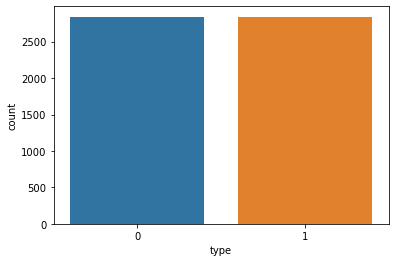

In [36]:
#visualizando a variável 'type' balanceada
sns.countplot(x = y_train, data=df_amazon)

In [38]:
y_train.value_counts()

0    2842
1    2842
Name: type, dtype: int64

## 3.2 Criação do Modelo

In [40]:
#importando bibliotecas para medir acurácia do modelo
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#importando bibliotecas com modelos de regressão logística, árvore de decisão, multinomial de Naive Bayes
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

In [41]:
#instanciando os modelos
lr = LogisticRegression()
dt = DecisionTreeClassifier()
mnb = MultinomialNB()

#criando os modelos preditivos
models = [lr, dt, mnb]

for model in models:
    m = model
    m.fit(X_train_cv, y_train)
    y_pred = m.predict(X_test_cv)
    
    print(m.__class__.__name__,':',accuracy_score(y_test,y_pred))

LogisticRegression : 0.9229957805907173
DecisionTreeClassifier : 0.8670886075949367
MultinomialNB : 0.7515822784810127


In [42]:
#Matriz de confusão

print (pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0    1   All
Real                    
0         935   13   948
1         458  490   948
All      1393  503  1896
